In [1]:
""" 
segmenting the tactile dataset into overlapping windows, normalizes specified columns, and saves the processed data as a CSV file.if the window_touch_type != 'NC'
then 'majority_voting == 1', else 'majority_voting == 0'
"""

# 用窗口取数, 
import os
import pandas as pd
import numpy as np

# 参数设置
window_size = 28
step_size = 14

# 读取数据
input_file = '../DATA/2_labeled_tactile_dataset.csv'
output_file = '../DATA/3_labeled_window_dataset.csv'
output_file_normalization = '../DATA/4_labeled_window_dataset_Normalization.csv'

df = pd.read_csv(input_file)

# 初始化存储窗口信息的列表
windowed_data = []

# 初始化 window_id
window_id = 0

normalization = False

""" 
Iterates over the data in step_size increments, creating windows of window_size length.
"""
# 循环以 step_size 步长遍历数据
for start in range(0, len(df) - window_size + 1, step_size):
    end = start + window_size

    window = df.iloc[start:end].copy()

    if normalization:
        cols_to_normalize = [
            'e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 
            'de0', 'de1', 'de2', 'de3', 'de4', 'de5', 'de6', 
            'tau_J0', 'tau_J1', 'tau_J2', 'tau_J3', 'tau_J4', 'tau_J5', 'tau_J6', 
            'tau_ext0', 'tau_ext1', 'tau_ext2', 'tau_ext3', 'tau_ext4', 'tau_ext5', 'tau_ext6'
        ]
        
        # 对每一列进行归一化
        for col in cols_to_normalize:
            mean_col = np.mean(window[col])
            std_col = np.std(window[col])
            # window[col] = (window[col] - mean_col) / (std_col + 1e-5)
            window[col] = window[col] / (std_col + 1e-5)

    # 生成 window_id
    window['window_id'] = window_id
    window_id += 1  # 每次迭代增加 window_id
    
    # 判断窗口内 touch_type 是否全为 'NC'
    unique_touch_types = window['touch_type'].unique()
    if len(unique_touch_types) == 1 and unique_touch_types[0] == 'NC':
        window_touch_type = 'NC'
    else:
        # 如果不是全为 'NC'，取窗口内唯一的非 'NC' 的 touch_type
        non_nc_touch_types = [t for t in unique_touch_types if t != 'NC']
        window_touch_type = non_nc_touch_types[0] if non_nc_touch_types else 'NC'
    
    # 给窗口内所有行赋值 window_touch_type
    window['window_touch_type'] = window_touch_type

    
    
    # 添加窗口数据到列表
    windowed_data.append(window)

# 合并所有窗口数据
windowed_df = pd.concat(windowed_data, ignore_index=True)

"""
Combines all windows into a single DataFrame and saves the result to 4_labeled_window_dataset_Normalization.csv if normalization is enabled; 
otherwise, it saves to 4_labeled_window_dataset.csv.
"""
if normalization:
    # 删除已存在的文件
    if os.path.exists(output_file_normalization):
        os.remove(output_file_normalization)

    # 保存到新的CSV文件
    windowed_df.to_csv(output_file_normalization, index=False)

else:

    if os.path.exists(output_file):
        os.remove(output_file)

    # 保存到新的CSV文件
    windowed_df.to_csv(output_file, index=False)
    

print(f"{output_file if not normalization else output_file_normalization} 文件已生成，总行数 = {len(windowed_df)}")


../DATA/3_labeled_window_dataset.csv 文件已生成，总行数 = 473284


In [3]:
import os
import pandas as pd
import numpy as np
df = pd.read_csv('../DATA/3_labeled_window_dataset.csv')
print(df.groupby('window_touch_type')['window_id'].nunique())
# # dt[dt['window_touch_type']=='ST']['window_id'].nunique()
# grouped = dt.groupby(['window_id', 'window_touch_type', 'touch_type']).size().reset_index(name='count')
# # # 展示结果
# print(grouped)
# dt[dt['window_touch_type']=='ST']

# dt[dt['window_id']==19942]
# # print(len(dt)/28)S

window_touch_type
DT     1129
G      1770
NC    11538
P      1717
ST      749
Name: window_id, dtype: int64


In [4]:
df.head()

,index,time,tau_J0,tau_J1,tau_J2,tau_J3,tau_J4,tau_J5,tau_J6,tau_J_d0,...,etau_J3,etau_J4,etau_J5,etau_J6,label,block_id,touch_type,window_id,window_touch_type,majority_voting
0,1.0,0.000000,-0.148950,-33.260303,-1.629527,19.343332,0.447105,2.415051,-0.089855,0.0,...,-19.343332,-0.447105,-2.415051,0.089855,0.0,-1.0,NC,0,NC,0
1,2.0,0.004996,-0.113244,-33.220631,-1.558116,19.232248,0.447105,2.415051,-0.079784,0.0,...,-19.232248,-0.447105,-2.415051,0.079784,0.0,-1.0,NC,0,NC,0
2,3.0,0.009996,-0.113244,-33.220631,-1.558116,19.232248,0.447105,2.415051,-0.079784,0.0,...,-19.232248,-0.447105,-2.415051,0.079784,0.0,-1.0,NC,0,NC,0
3,4.0,0.015003,-0.148950,-33.260303,-1.593821,19.343332,0.465415,2.404980,-0.059643,0.0,...,-19.343332,-0.465415,-2.404980,0.059643,0.0,-1.0,NC,0,NC,0
4,5.0,0.020783,-0.148950,-33.260303,-1.593821,19.343332,0.465415,2.404980,-0.059643,0.0,...,-19.343332,-0.465415,-2.404980,0.059643,0.0,-1.0,NC,0,NC,0


/tmp/ipykernel_809462/161598779.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


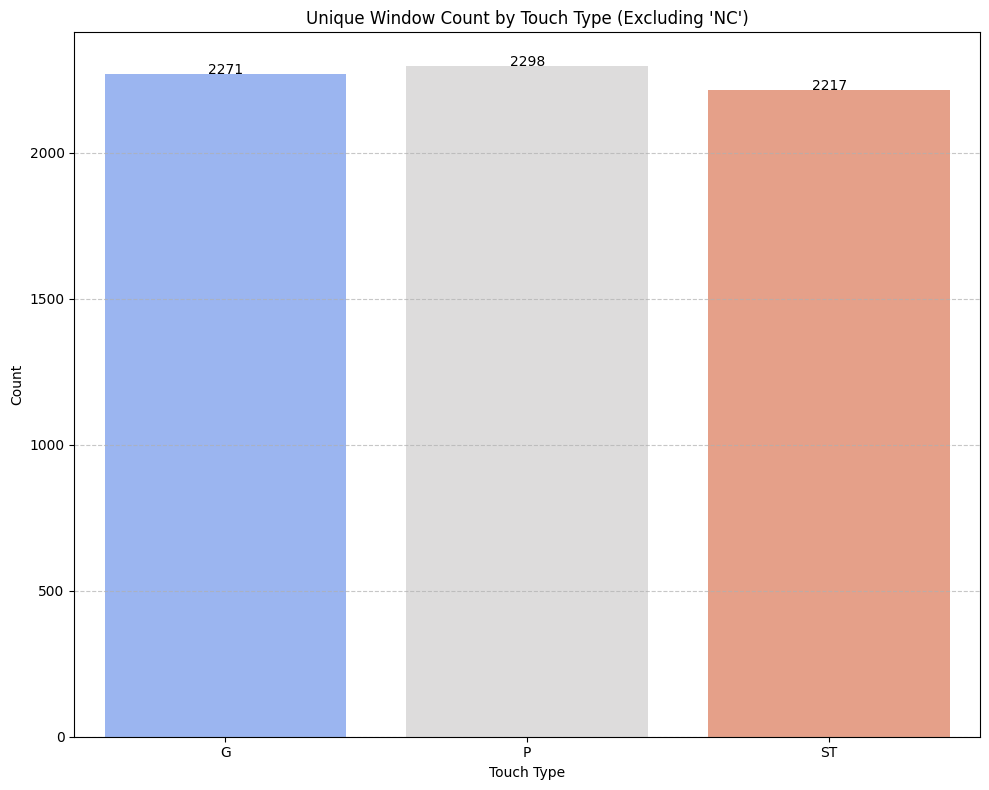

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out data where touch_type is "NC"
filtered_df = df[df['touch_type'] != 'NC']

# Count unique block_ids for each touch_type
unique_block_counts = filtered_df.groupby('window_touch_type')['window_id'].nunique()

# Set up the plot
plt.figure(figsize=(10, 8))
sns.barplot(
    x=unique_block_counts.index, 
    y=unique_block_counts.values, 
    palette="coolwarm"
)

# Add titles and axis labels
plt.title("Unique Window Count by Touch Type (Excluding 'NC')")
plt.xlabel("Touch Type")
plt.ylabel("Count")
plt.xticks(fontsize=10)

# Add value annotations above the bars
for i, value in enumerate(unique_block_counts.values):
    plt.text(i, value , f"{value}", ha='center', color="black")

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
dt = pd.read_csv('../DATA/3_labeled_window_dataset_post123.csv')
dt.head()
dt.columns

Index(['index', 'time', 'tau_J0', 'tau_J1', 'tau_J2', 'tau_J3', 'tau_J4',
       'tau_J5', 'tau_J6', 'tau_J_d0', 'tau_J_d1', 'tau_J_d2', 'tau_J_d3',
       'tau_J_d4', 'tau_J_d5', 'tau_J_d6', 'tau_ext0', 'tau_ext1', 'tau_ext2',
       'tau_ext3', 'tau_ext4', 'tau_ext5', 'tau_ext6', 'q0', 'q1', 'q2', 'q3',
       'q4', 'q5', 'q6', 'q_d0', 'q_d1', 'q_d2', 'q_d3', 'q_d4', 'q_d5',
       'q_d6', 'dq0', 'dq1', 'dq2', 'dq3', 'dq4', 'dq5', 'dq6', 'dq_d0',
       'dq_d1', 'dq_d2', 'dq_d3', 'dq_d4', 'dq_d5', 'dq_d6', 'e0', 'e1', 'e2',
       'e3', 'e4', 'e5', 'e6', 'de0', 'de1', 'de2', 'de3', 'de4', 'de5', 'de6',
       'etau_J0', 'etau_J1', 'etau_J2', 'etau_J3', 'etau_J4', 'etau_J5',
       'etau_J6', 'label', 'block_id', 'touch_type', 'window_id',
       'window_touch_type'],
      dtype='object')

In [16]:
print(dt.groupby('window_touch_type')['window_id'].nunique())

window_touch_type
G      2271
NC    22225
P      2298
ST     2217
Name: window_id, dtype: int64
